# Data Exploration  


Goal: how many of each event type we have 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os


from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'


## See what kind of variables might be nice to have

In [ ]:
# "1900_02_TeamKJ_TeamB" is what I have been working with so far,
# but this is early, so it might not have the later events?

which_game = "1903_02_TeamNE_TeamA2" # "1903_01_TeamNE_TeamA2" # "1900_02_TeamKJ_TeamB"

In [ ]:
game_info_df = pd.read_csv("data/game_info/game_info-" + which_game + ".csv", index_col=0)
game_info_df.head()

In [ ]:
game_events_df = pd.read_csv("data/game_events/game_events-" + which_game + ".csv", index_col=0)
game_events_df["event"] = game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])
game_events_df.head()

#### All of the plays that have a 0 for batter, but have a ball hit into play

In [ ]:
zero_batters = game_info_df.loc[game_info_df["batter"] == 0, :]
zero_batters

In [ ]:
game_info_df.loc[game_info_df["play_per_game"].isin([3, 4, 5]), :]

In [ ]:
game_events_df.loc[(game_events_df["play_per_game"].isin(zero_batters["play_per_game"]))# &\
                   #(game_events_df["event_code"] == 4)
                   , ["game_str", "play_id", "play_per_game", "event_code"]]

#### find all the instances where a ball is hit into play, but it shows that there is no batter

In [14]:
all_games = []

for sub_dir, dirs, files in os.walk('data/game_events/'):
    for file in files:
        if "checkpoint" in file:
                continue
    
        all_games.append(file.split("-")[-1].split(".csv")[0])

print(len(all_games))        

97


In [ ]:
zeros = pd.DataFrame()

for g in all_games:
    this_game = Game(g)
    
    zero_batters = this_game.game_info_df.loc[this_game.game_info_df["batter"] == 0, :]

    events_w_data = this_game.game_events_df.loc[(this_game.game_events_df["play_per_game"].isin(zero_batters["play_per_game"])) # &\
                                                #(this_game.game_events_df["event_code"] == 4)
                                                , ["game_str", "play_id", "play_per_game", "event_code"]]
    
    zeros = pd.concat([zeros, events_w_data])
    


In [ ]:
zeros[["game_str", "play_id", "play_per_game"]].drop_duplicates()

In [ ]:
zeros[["game_str", "play_id", "play_per_game"]].drop_duplicates().to_csv("data_debugging/batter_as_zeros.csv", index = False)

In [ ]:
game_1903_01 = Game("1903_01_TeamNE_TeamA2")

In [ ]:
game_1903_01.game_info_df.loc[(game_1903_01.game_info_df["batter"]) == 0, :]

In [ ]:
game_1903_01.game_info_df.loc[(game_1903_01.game_info_df["batter"]) == 0, :]

#### Do the fields I except to line up, actually line up?

In [ ]:
mismatched_play_ids = game_events_df.loc[game_events_df["play_id"] != game_events_df["play_per_game"], :]

In [ ]:
mismatched_play_ids

In [ ]:
#mismatched_play_ids["play_id_shifted"] = 
first_mismatch = mismatched_play_ids.loc[mismatched_play_ids["play_id"].diff() != mismatched_play_ids["play_per_game"].diff(), :]
first_mismatch

In [ ]:
# Something weird is going on with play id 

# HMM, play_per_game just skips? I wonder if that was like a pitching change or something

game_events_df.loc[(game_events_df["play_id"] >= first_mismatch.iloc[0]["play_id"] - 3) & (game_events_df["play_id"] <= first_mismatch.iloc[0]["play_id"] + 3) , :]

In [ ]:
game_info_df.loc[(game_info_df["play_per_game"] >= 125) & (game_info_df["play_per_game"] <= 130), :]

In [ ]:
# 1903_02_TeamNE_TeamA2 is all weird!

game_events_df.loc[(game_events_df["play_id"] >= first_mismatch.iloc[1]["play_id"] - 3) & (game_events_df["play_id"] <= first_mismatch.iloc[1]["play_id"] + 3) , :].drop_duplicates()

In [ ]:
game_info_df.loc[(game_info_df["play_per_game"] >= 208) & (game_info_df["play_per_game"] <= 215), :]

### Count all of the games that have a mismatch, and report the first time they mismatch

In [15]:
mismatches = pd.DataFrame()

for g in all_games:
    this_game = Game(g)
    
    
    mismatched_play_ids = this_game.game_events_df.loc[this_game.game_events_df["play_id"] != this_game.game_events_df["play_per_game"], :]
    first_mismatch = mismatched_play_ids.loc[mismatched_play_ids["play_id"].diff() != mismatched_play_ids["play_per_game"].diff(), :]

    game_events_mismatched = this_game.game_events_df.loc[(this_game.game_events_df["play_per_game"].isin(first_mismatch["play_per_game"]))  &\
                                                          (this_game.game_events_df["play_id"].isin(first_mismatch["play_id"]))
                                                , ["game_str", "play_id", "play_per_game", "event_code"]]
    
    mismatches = pd.concat([mismatches, game_events_mismatched])
    

In [24]:
mismatched_play_ids.loc[(mismatched_play_ids["play_id"].diff() != mismatched_play_ids["play_per_game"].diff() ), :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
892,1902_31_TeamMF_TeamA2,258,63.0,259,8396146,1,1,pitch,2.0,ball acquired,8396696.0


In [16]:
mismatches

,game_str,play_id,play_per_game,event_code
853,1903_01_TeamNE_TeamA2,223,224,1
854,1903_01_TeamNE_TeamA2,223,224,4
855,1903_01_TeamNE_TeamA2,223,224,16
856,1903_01_TeamNE_TeamA2,223,224,16
857,1903_01_TeamNE_TeamA2,223,224,2
...,...,...,...,...
1012,1901_11_TeamLJ_TeamB,276,278,2
1013,1901_11_TeamLJ_TeamB,276,278,5
892,1902_31_TeamMF_TeamA2,258,259,1
894,1902_31_TeamMF_TeamA2,258,259,2


In [19]:
mismatches[["game_str", "play_id", "play_per_game"]].drop_duplicates().sort_values(["game_str", "play_id", "play_per_game"])

,game_str,play_id,play_per_game
631,1900_01_TeamKJ_TeamB,178,179
574,1900_03_TeamKJ_TeamB,166,167
720,1900_05_TeamKK_TeamB,205,206
213,1900_09_TeamKK_TeamB,59,60
232,1900_09_TeamKK_TeamB,65,67
...,...,...,...
945,1903_31_TeamNB_TeamA1,248,253
101,1903_32_TeamNB_TeamA1,22,23
196,1903_32_TeamNB_TeamA1,46,48
326,1903_32_TeamNB_TeamA1,77,80


In [20]:
mismatches[["game_str", "play_id", "play_per_game"]].drop_duplicates().sort_values(["game_str", "play_id", "play_per_game"]).to_csv("data_debugging/play_id_play_per_game_mismatches.csv", index = False)

In [18]:
# yikes, half of them have this mismatch

mismatches[["game_str"]].drop_duplicates().shape

(48, 1)

In [22]:
# Which have the most?

mismatches[["game_str"]].value_counts()

game_str             
1901_03_TeamLG_TeamA3    60
1903_25_TeamNK_TeamB     46
1903_02_TeamNE_TeamA2    37
1903_23_TeamNA_TeamA1    29
1903_21_TeamNL_TeamB     28
1903_30_TeamNB_TeamA1    26
1903_19_TeamNL_TeamB     23
1903_06_TeamND_TeamA2    21
1901_18_TeamLH_TeamA3    20
1903_04_TeamNC_TeamA1    19
1903_20_TeamNL_TeamB     19
1903_32_TeamNB_TeamA1    19
1903_11_TeamNC_TeamA1    18
1903_26_TeamNK_TeamB     16
1903_31_TeamNB_TeamA1    15
1901_17_TeamLH_TeamA3    14
1901_06_TeamLI_TeamA3    14
1903_16_TeamNI_TeamA3    12
1903_10_TeamNJ_TeamB     12
1901_07_TeamLK_TeamB     11
1903_09_TeamNJ_TeamB      9
1903_27_TeamNH_TeamA3     9
1900_09_TeamKK_TeamB      9
1901_09_TeamLK_TeamB      8
1903_12_TeamNC_TeamA1     8
1903_01_TeamNE_TeamA2     8
1901_16_TeamLH_TeamA3     7
1903_25_TeamNH_TeamA3     6
1903_03_TeamNE_TeamA2     6
1902_05_TeamML_TeamB      6
1901_04_TeamLI_TeamA3     6
1901_10_TeamLJ_TeamB      6
1903_08_TeamNJ_TeamB      3
1900_05_TeamKK_TeamB      3
1901_08_TeamLK_TeamB      

In [3]:
game_1903_25 = Game("1903_25_TeamNH_TeamA3")

In [4]:
game_1903_25.game_events_df.loc[game_1903_25.game_events_df["play_id"] == 218, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
838,1903_25_TeamNH_TeamA3,218,62,219,7762461,1,1,pitch,2.0,ball acquired,7763011.0
840,1903_25_TeamNH_TeamA3,218,62,219,7763011,2,2,ball acquired,5.0,end of play,7763011.0
839,1903_25_TeamNH_TeamA3,218,62,219,7763011,0,5,end of play,NaN,NaN,NaN


In [5]:
game_1903_25.game_info_df.loc[game_1903_25.game_info_df["play_per_game"].isin([217, 218, 219, 220, 221]), :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
217,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,61,217,8,Top,2592,2222,2480,2382,1784,1643,1258,2737,1617,8969,5592,0,0
218,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,61,218,8,Top,2592,2222,2480,2382,1784,1643,1258,2737,1617,8969,5592,0,0
219,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,62,219,8,Top,2592,2222,2480,2382,1784,1643,1258,2737,1617,9618,5592,0,0
220,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,62,220,8,Top,2592,2222,2480,2382,1784,1643,1258,2737,1617,9618,5592,0,0
221,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,62,221,8,Top,2592,2222,2480,2382,1784,1643,1258,2737,1617,9618,5592,0,0


In [6]:
game_1903_23 = Game("1903_23_TeamNA_TeamA1")

In [7]:
game_1903_25.game_events_df.loc[game_1903_25.game_events_df["play_id"].isin([36, 37, 38, 39, 40]), :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
144,1903_25_TeamNH_TeamA3,36,10,36,1082861,1,1,pitch,2.0,ball acquired,1083411.0
145,1903_25_TeamNH_TeamA3,36,10,36,1083411,2,2,ball acquired,5.0,end of play,1083411.0
146,1903_25_TeamNH_TeamA3,36,10,36,1083411,0,5,end of play,NaN,NaN,NaN
147,1903_25_TeamNH_TeamA3,37,10,37,1120961,1,1,pitch,2.0,ball acquired,1121461.0
148,1903_25_TeamNH_TeamA3,37,10,37,1121461,2,2,ball acquired,5.0,end of play,1121461.0
149,1903_25_TeamNH_TeamA3,37,10,37,1121461,0,5,end of play,NaN,NaN,NaN
150,1903_25_TeamNH_TeamA3,38,10,39,1164711,1,1,pitch,2.0,ball acquired,1165161.0
152,1903_25_TeamNH_TeamA3,38,10,39,1165161,2,2,ball acquired,5.0,end of play,1165161.0
151,1903_25_TeamNH_TeamA3,38,10,39,1165161,0,5,end of play,NaN,NaN,NaN
153,1903_25_TeamNH_TeamA3,39,10,40,1186211,1,1,pitch,4.0,ball hit into play,1186661.0


In [8]:
game_1903_25.game_events_df.loc[game_1903_25.game_events_df["play_id"].isin([268, 269, 270, 271]), :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
1029,1903_25_TeamNH_TeamA3,268,75,269,9810711,1,1,pitch,2.0,ball acquired,9811211.0
1030,1903_25_TeamNH_TeamA3,268,75,269,9811211,2,2,ball acquired,5.0,end of play,9811211.0
1031,1903_25_TeamNH_TeamA3,268,75,269,9811211,0,5,end of play,NaN,NaN,NaN
1032,1903_25_TeamNH_TeamA3,269,75,271,9858961,1,1,pitch,4.0,ball hit into play,9859361.0
1033,1903_25_TeamNH_TeamA3,269,75,271,9859361,10,4,ball hit into play,5.0,end of play,9859461.0
1034,1903_25_TeamNH_TeamA3,269,75,271,9859461,0,5,end of play,NaN,NaN,NaN
1035,1903_25_TeamNH_TeamA3,270,75,272,9885511,1,1,pitch,4.0,ball hit into play,9885911.0
1036,1903_25_TeamNH_TeamA3,270,75,272,9885911,10,4,ball hit into play,5.0,end of play,9885961.0
1037,1903_25_TeamNH_TeamA3,270,75,272,9885961,0,5,end of play,NaN,NaN,NaN
1038,1903_25_TeamNH_TeamA3,271,75,273,9910311,1,1,pitch,4.0,ball hit into play,9910761.0


In [9]:
mismatched_play_ids = game_1903_25.game_events_df.loc[game_1903_25.game_events_df["play_id"] != game_1903_25.game_events_df["play_per_game"], :]


In [ ]:
first_mismatch = mismatched_play_ids.loc[mismatched_play_ids["play_id"].diff() != mismatched_play_ids["play_per_game"].diff(), :]

first_mismatch

In [ ]:
game_events_mismatched = game_1903_25.game_events_df.loc[(game_1903_25.game_events_df["play_per_game"].isin(first_mismatch["play_per_game"]))  &\
                                                          (game_1903_25.game_events_df["play_id"].isin(first_mismatch["play_id"]))
                                                , ["game_str", "play_id", "play_per_game", "event_code"]]

In [ ]:
game_events_mismatched

In [ ]:
play_id_play_per_game_mapper = game_1903_25.game_events_df[["play_id" , "play_per_game"]].drop_duplicates()

In [ ]:
game_1903_25.game_info_df.loc[game_1903_25.game_info_df["play_per_game"] == play_id_play_per_game_mapper.loc[play_id_play_per_game_mapper["play_id"] == 269, "play_per_game"].values[0], :]

In [ ]:
game_1903_25.game_info_df

In [10]:
game_1903_25.get_this_play(269, "game_info")

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
270,1903_25_TeamNH_TeamA3,TeamA3,TeamNH,75,271,10,Top,2035,2222,2480,1628,1784,1643,1258,2737,1617,5592,6392,0,0


In [3]:
x = Game("1903_07_TeamND_TeamA2")

In [4]:
x.game_events_df.loc[x.game_events_df["play_per_game"] == 168, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
622,1903_07_TeamND_TeamA2,167,38,168,4912923,1,1,pitch,4.0,ball hit into play,4913323.0
623,1903_07_TeamND_TeamA2,167,38,168,4913323,10,4,ball hit into play,5.0,end of play,4913573.0
624,1903_07_TeamND_TeamA2,167,38,168,4913573,0,5,end of play,NaN,NaN,NaN


In [5]:
x.game_events_df.loc[x.game_events_df["play_per_game"] == 169, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
625,1903_07_TeamND_TeamA2,168,38,169,4944673,1,1,pitch,2.0,ball acquired,4945173.0
626,1903_07_TeamND_TeamA2,168,38,169,4945173,2,2,ball acquired,3.0,throw (ball-in-play),4945773.0
627,1903_07_TeamND_TeamA2,168,38,169,4945773,2,3,throw (ball-in-play),2.0,ball acquired,4947073.0
628,1903_07_TeamND_TeamA2,168,38,169,4947073,4,2,ball acquired,5.0,end of play,4948173.0
629,1903_07_TeamND_TeamA2,168,38,169,4948173,0,5,end of play,NaN,NaN,NaN


In [6]:
x.game_info_df.loc[x.game_info_df["play_per_game"] == 169, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
168,1903_07_TeamND_TeamA2,TeamA2,TeamND,38,169,5,Top,1843,2790,2480,1557,2137,1972,2526,1177,2973,0,8032,6851,0


In [7]:
x.game_info_df.loc[x.game_info_df["play_per_game"].isin([168, 169, 170]), :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
167,1903_07_TeamND_TeamA2,TeamA2,TeamND,38,168,5,Top,1843,2790,2480,1557,2137,1972,2526,1177,2973,8032,6851,0,0
168,1903_07_TeamND_TeamA2,TeamA2,TeamND,38,169,5,Top,1843,2790,2480,1557,2137,1972,2526,1177,2973,0,8032,6851,0
169,1903_07_TeamND_TeamA2,TeamA2,TeamND,39,170,5,Top,1843,2790,2480,1557,2137,1972,2526,1177,2973,5177,8032,6851,0


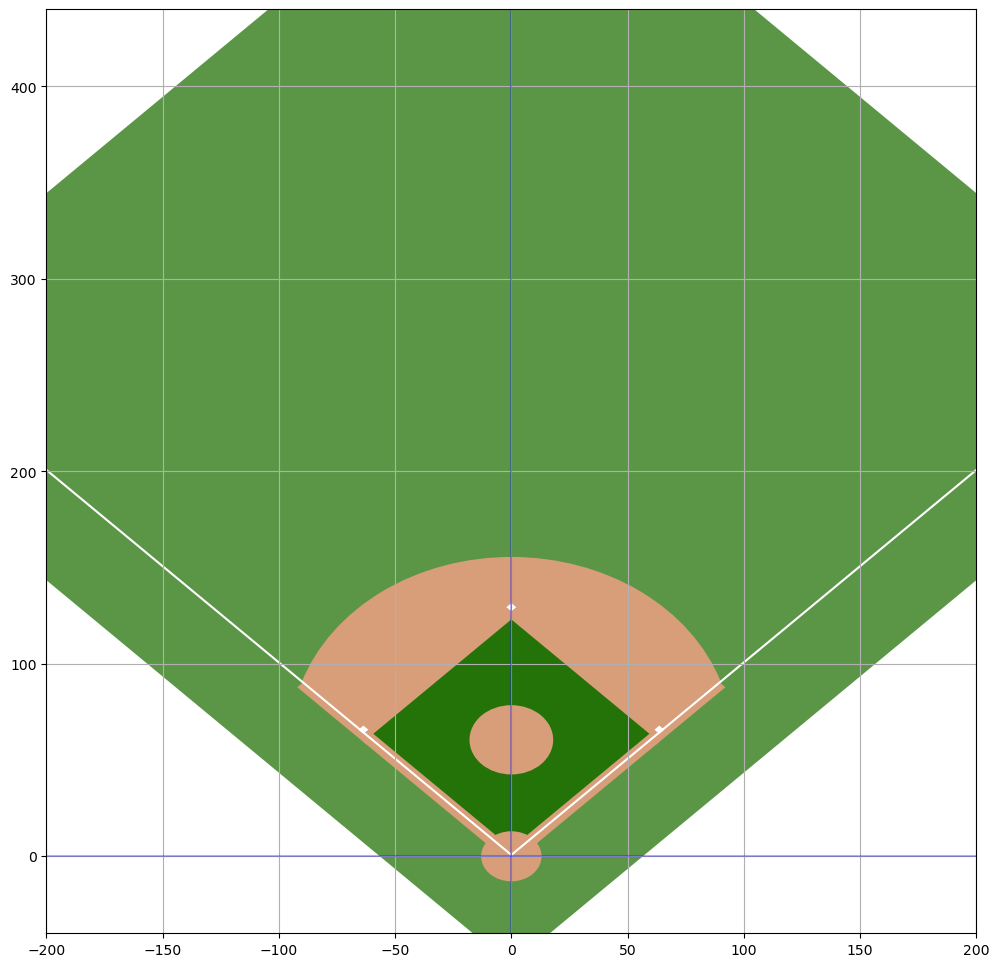

In [8]:
bf_1903_07 = Baseball_Field("1903_07_TeamND_TeamA2")

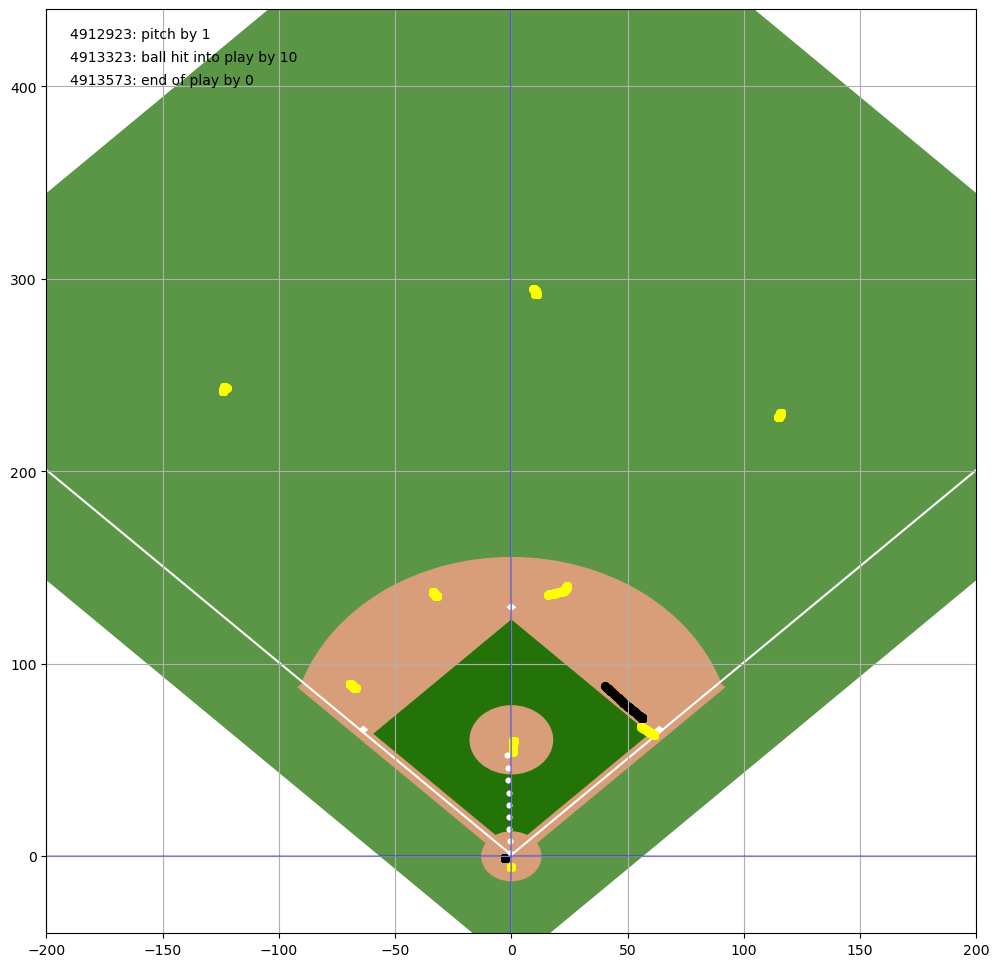

In [12]:
bf_1903_07.clear_plot()


bf_1903_07.plot_all_components(play_id=167)

bf_1903_07.fig

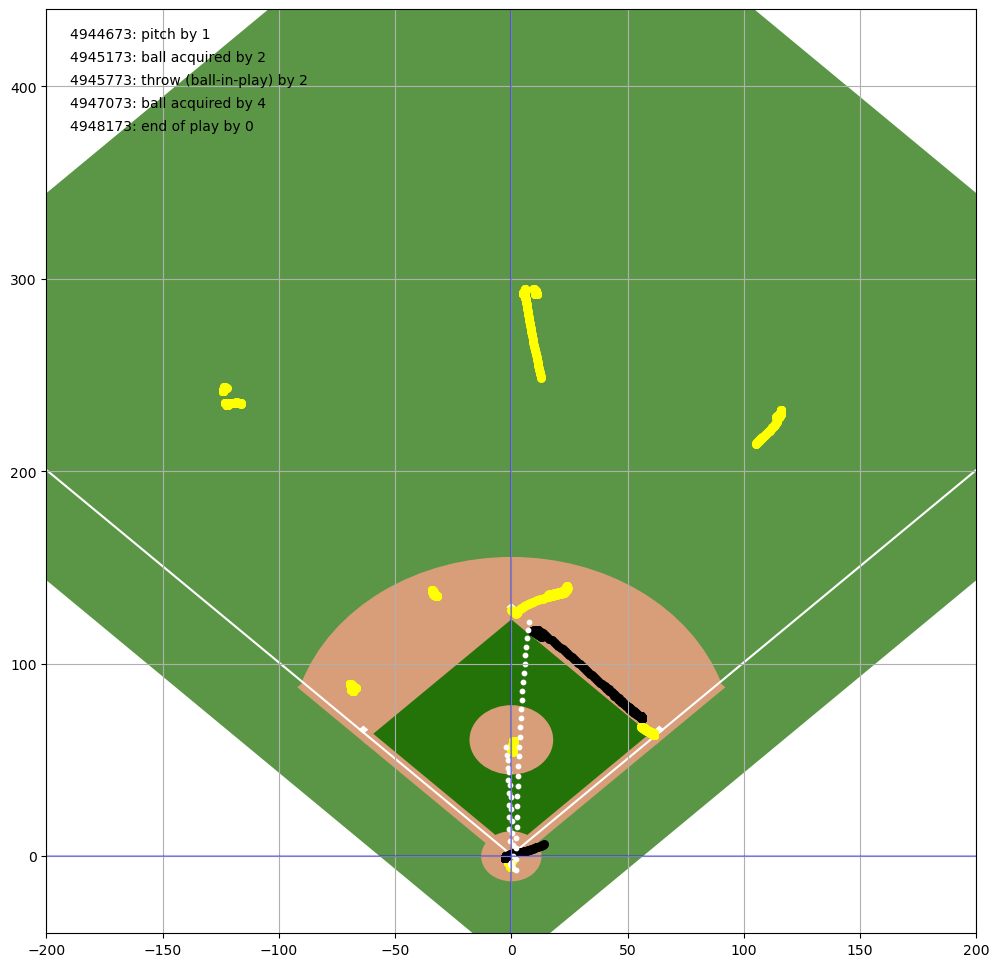

In [11]:
bf_1903_07.clear_plot()

bf_1903_07.plot_all_components(play_id=168)

bf_1903_07.fig

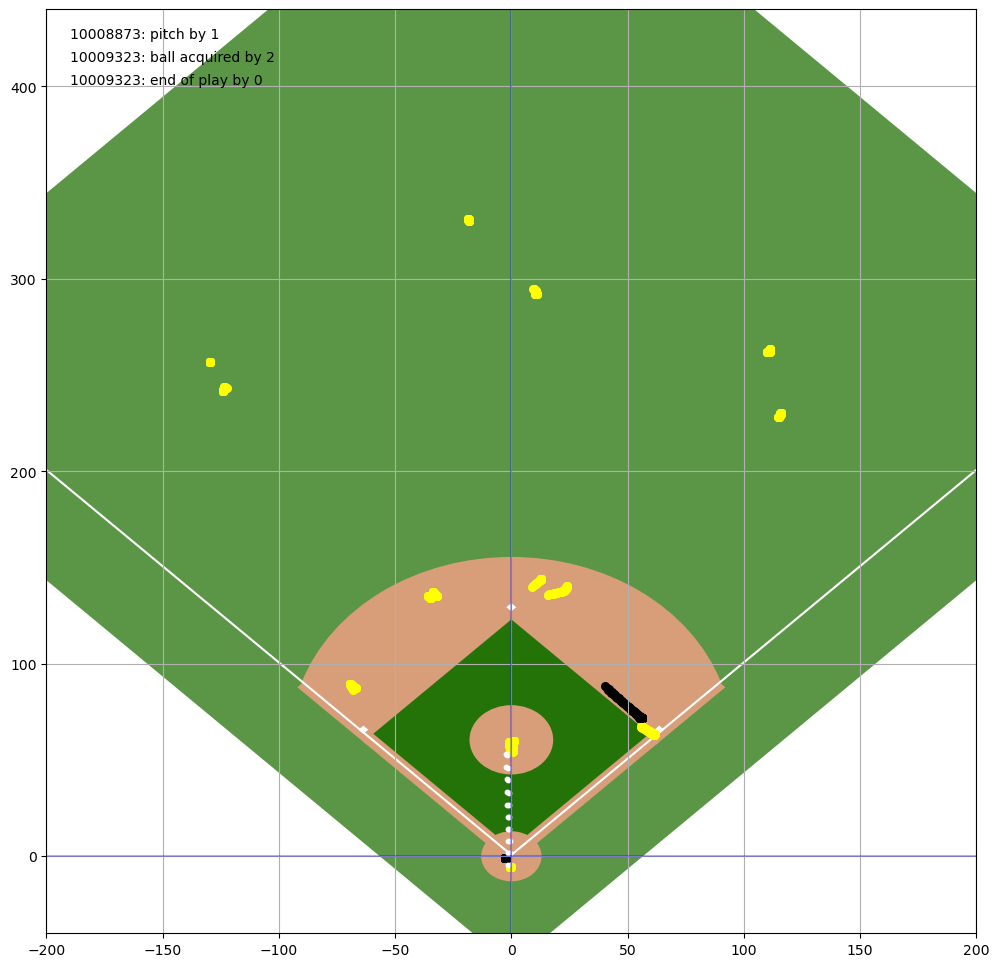

In [22]:
bf_1903_07.clear_plot()

bf_1903_07.plot_all_components(play_id=304)

bf_1903_07.fig

In [23]:
x.game_events_df.loc[x.game_events_df["play_per_game"] == 305, :]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event,next_event_code,next_event,next_event_ts
1103,1903_07_TeamND_TeamA2,304,69,305,10008873,1,1,pitch,2.0,ball acquired,10009323.0
1104,1903_07_TeamND_TeamA2,304,69,305,10009323,2,2,ball acquired,5.0,end of play,10009323.0
1105,1903_07_TeamND_TeamA2,304,69,305,10009323,0,5,end of play,NaN,NaN,NaN


In [26]:
x.game_info_df.loc[x.game_info_df["play_per_game"] == 304, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
303,1903_07_TeamND_TeamA2,TeamA2,TeamND,69,304,9,Top,1752,2790,2480,1557,2137,1972,2526,1177,2973,3317,9465,0,0


In [24]:
x.game_info_df.loc[x.game_info_df["play_per_game"] == 305, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
304,1903_07_TeamND_TeamA2,TeamA2,TeamND,69,305,9,Top,1752,2790,2480,1557,2137,1972,2526,1177,2973,0,3317,9465,0


In [27]:
x.game_info_df.loc[x.game_info_df["play_per_game"] == 306, :]

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
305,1903_07_TeamND_TeamA2,TeamA2,TeamND,70,306,9,Top,1752,2790,2480,1557,2137,1972,2526,1177,2973,6902,6875,9465,0


In [27]:
x.get_this_play("168", "game_info")

IndexError: index 0 is out of bounds for axis 0 with size 0

## What I notice isn't there that might be nice to have:
- the at_bat field is not there for older games
- I don't think I have any outs or count
    - Not sure I can get counts
- ~~Players speed at a given time~~
- Player orientation?
    - I think I could noisily infer this
- I don't think that "ball bounce" is in the older data -- how is this defined?
    - I could maybe fill this one in if z_coord is < 0.5 or something arbitrarily small?

### Try to fill in the at_bat field

In [ ]:
ball_hitting_something_df = game_events_df.loc[game_events_df["event"].isin(["ball deflection", "ball deflection off of wall", "ball bounce"]), :]

In [ ]:
ball_hitting_something_df["event"].value_counts()

In [ ]:
def add_at_bat_data(df): 
    pass

In [ ]:
game_info_df.head()

In [ ]:
# assumption: an at_bat is when the pitcher and batter are the same?
# this is wrong when a pitcher is changed mid inning
# this is also wrong when a batter is changed 

game_info_df.loc[:5, ["inning", "top_bottom_inning", "pitcher", "batter",]].groupby(["inning", "top_bottom_inning", "pitcher", "batter"]).cumcount() + 1

In [ ]:
grouping_cols = ["inning", "top_bottom_inning", "pitcher", "batter"]

new_game_info_df = game_info_df.copy()


new_game_info_df.loc[:10, grouping_cols]

In [ ]:
new_game_info_df["play_per_pa"] = new_game_info_df.loc[:, :].groupby(grouping_cols).cumcount() + 1

In [ ]:
# this is a check: the play_per_game should be equal to the running sum of play_per_pa when there is a new at bat?

new_game_info_df["play_per_pa"].head(10).cumsum()

In [ ]:
new_game_info_df.head()

In [ ]:
new_game_info_df["new_at_bat"] = (new_game_info_df.loc[new_game_info_df["play_per_pa"] == 1 , ["play_per_pa"]]\
.groupby("play_per_pa").cumcount() + 1)

new_game_info_df["new_at_bat"] = new_game_info_df["new_at_bat"].fillna(method='ffill', inplace=False).astype(int)

In [ ]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 1 == new_game_info_df["new_at_bat"], :].head()

In [ ]:
new_game_info_df["new_at_bat_shifted"] = new_game_info_df["new_at_bat"].shift()

In [ ]:
new_game_info_df.loc[(new_game_info_df["at_bat"] != new_game_info_df["new_at_bat"]) &\
                     (new_game_info_df["new_at_bat"] != new_game_info_df["new_at_bat_shifted"])]

In [ ]:
new_game_info_df.loc[(new_game_info_df["at_bat"] != new_game_info_df["new_at_bat"]) & (new_game_info_df["batter"] == 0), :]

In [ ]:
new_game_info_df.loc[130:135, :]

In [ ]:
# WHAT THE HECK, THE PLAY_PER_GAME AND PLAY_ID ARE DIFFERENT?

In [ ]:
# HMM I kind of suspect that this batter being 0 would mean that the batter for the next play is the correct batter

In [ ]:
game_events_df.loc[game_events_df["play_id"] == 132, :]

In [ ]:
game_events_df.loc[game_events_df["play_id"] == 133, :]

In [ ]:
player_pos = bf.game_obj.player_pos_df.copy()

In [ ]:
# I think I expect this one to be 2053

# Also batters are at a frequency of 20 Hz it looks like?

player_pos.loc[(player_pos["play_id"] == 133 ) & ( player_pos["player_position"] == 10), :]

In [ ]:
# Something is really off here about how I am calculating ABs

bf = Baseball_Field(which_game=which_game)


In [ ]:
bf.create_gif(play_id=3, tag="_at_bat_probs")

In [ ]:
bf.create_gif(play_id=4, tag="_at_bat_probs")

In [ ]:
bf.create_gif(play_id=133, tag="_at_bat_probs")

In [ ]:
## something happens at play 101, where a batter is awarded first with no batter? I think this is a IBB or HBP?

new_game_info_df.loc[98:105, :]

In [ ]:
game_events_df.loc[game_events_df["play_per_game"] == 101, :]

In [ ]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 2 == new_game_info_df["new_at_bat"], :]

In [ ]:
# Something weird also happens at play id 160 and 202

new_game_info_df.loc[158:162, :]

In [ ]:
# gotta be honest, I am a bit confused by this one -- there are several plays in a row, where the 
# events show a pitch, but the game info doesn't show a batter?
game_events_df.loc[game_events_df["play_per_game"] == 162, :]

In [ ]:
game_info_df.loc[200:205, :]

In [ ]:
new_game_info_df.loc[200:205, :]

In [ ]:
game_events_df.loc[game_events_df["play_per_game"] == 202, :]

In [ ]:
# I am a bit confused by this one as well -- this one has a play which shows the batter and runner on first both advance?
# so is that like a dropped 3rd that kicks around the backstop?

game_events_df.loc[game_events_df["play_per_game"] == 203, :]

In [ ]:
# gotta be honest, I am a bit confused by this one -- there are several plays in a row, where the 
# events show a pitch, but the game info doesn't show a batter?
game_events_df.loc[game_events_df["play_per_game"] == 203, :]

In [ ]:
new_game_info_df.loc[new_game_info_df["at_bat"] + 3 == new_game_info_df["new_at_bat"], :]

#### Use at_bat field to fill in outs?

- double check me on that

In [ ]:
### 

### What are the most common events?
- Corollary: when were they added?

In [ ]:
# These figures aren't all that useful as they stand honestly

In [ ]:
game_events_monitoring = pd.DataFrame()

root_dirs = ['data/game_events/'] 


for root_dir in root_dirs:
    for sub_dir, dirs, files in os.walk(root_dir):
        for file in files:
            if "checkpoint" in file:
                continue
            
            temp_game_events_df = pd.read_csv(os.path.join(sub_dir, file), index_col=0)
            temp_game_events_df["event"] = temp_game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])
            
            temp_df = pd.DataFrame(temp_game_events_df["event"].value_counts(normalize=True))
            
            # take just the first part
            temp_df["game"] = file.split(".csv")[0]
            
            temp_df = temp_df.reset_index(drop=False)
            
            game_events_monitoring = pd.concat([game_events_monitoring, temp_df])

            
game_events_monitoring = game_events_monitoring.reset_index()                


In [ ]:
# some plots by game might be useful here, or like a little dashboard or something 

In [ ]:
game_events_monitoring

In [ ]:
game_events_monitoring_df = game_events_monitoring.pivot(index='game', columns="index", values="event").sort_index()

In [ ]:
game_events_monitoring_df = game_events_monitoring_df.reset_index()

game_events_monitoring_df["away"] = game_events_monitoring_df["game"].str.split("_Team").apply(lambda x: x[1])
game_events_monitoring_df["home"] = game_events_monitoring_df["game"].str.split("_Team").apply(lambda x: x[-1])

game_events_monitoring_df["year"] = game_events_monitoring_df["game"].str.strip("game_events-").str.split("_").apply(lambda x: x[0])
game_events_monitoring_df["game_num"] = game_events_monitoring_df["game"].str.strip("game_events-").str.split("_").apply(lambda x: x[1])

# game_events_monitoring_df = game_events_monitoring_df.set_index('game')

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

i =0
for team in ['B', 'A3', 'A2', 'A1']:
    
    lines = game_events_monitoring_df.loc[game_events_monitoring_df["home"] == team, :].plot(kind = "line", ax=ax[i // 2][i % 2])
    
    i += 1

plt.xticks(rotation=90)

In [ ]:
for year in ["1900", "1901", "1902", "1903"]:
    i = 0
    
    this_year = game_events_monitoring_df.loc[(game_events_monitoring_df["year"] == year), :]
    this_year_teams = this_year["home"].unique()
    
    fig, ax = plt.subplots(nrows=4 , figsize=(12,12))

    for team in this_year["home"].unique():

        plot_df = game_events_monitoring_df.loc[(game_events_monitoring_df["home"] == team) & (game_events_monitoring_df["year"] == year), :]
        
        
        plot_df.plot(kind = "line", x="game_num", ax=ax[i])

        i += 1

plt.xticks(rotation=90)

### How many throws does each player(/position) make?

In [ ]:
all_game_events = concat_game_events_into_single_file(write=False)

In [ ]:
all_game_events.head()

In [ ]:
all_game_events["event"].value_counts()

In [ ]:
group_by_cols = ["player_position", "event"]


first_base_receives = all_game_events.loc[(all_game_events["event"] == "ball acquired") &\
                                      (all_game_events["player_position"] == 3)&\
                                      (all_game_events["last_event"] == "throw (ball-in-play)"), :]

first_base_receives.loc[:, "last_player_position"].value_counts(normalize = True).plot(kind="barh", title="First Baseman Recieves across all data")

plt.ylabel("Throwing Player")
plt.xlabel("Frequency")

print(first_base_receives.shape)



In [ ]:
game_events_df["last_event_code"] = game_events_df["event_code"].shift(1)

In [ ]:
game_events_df["last_player_position"] = game_events_df["player_position"].shift(1)

In [ ]:
game_events_df["last_event"] = game_events_df["last_event_code"].map(lambda x: EVENT_CODE_TO_DESC[x] if pd.notnull(x) else x)

In [ ]:
this_game_first_base_acqs = game_events_df.loc[(game_events_df["event"] == "ball acquired") &\
                                               (game_events_df["player_position"] == 3) &\
                                               (game_events_df["last_event"] == "throw (ball-in-play)")
                                               , :]

In [ ]:
this_game_first_base_acqs.shape[0]

### How often is the ball acquired by each player?